# Singular spectrum analysis

### Introduction

Singular Spectrum Analysis (SSA) is a non-parametric technique of time series analysis and forecasting. SSA aims at decomposing the original series in a small number of possibly interpretable components such as a slowly varying trend, oscillatory components, and noise.
This documentation describes the ssaBasic class which implements the Singular Spectrum Analysis (SSA) according to the book "Analysis of Time Series Structure: SSA and Related Techniques" by N. Golyandina, V. Nekrutkin, and A. Zhigljavsky, 2001.

In [3]:
import numpy as np
import pandas as pd
from scipy.linalg import hankel
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns
import warnings
from numpy.matlib import repmat
from ssaBasic import ssaBasic
import random

### Sample data

In [5]:
# Parameters
N = 400
t = np.arange(1, N + 1) - np.floor(N / 2)
np.random.seed(1)
random.seed(1)

# Generate data
data = t / 40 + 4 * np.sin(2 * np.pi * t / 40) + 2 * (np.random.rand(1, N) - 0.5)

### 1. INITIALIZE: ssaBasic(data, L0)
Initializes the ssaBasic class with the original time series data and the number of Lags L0 (or window length).

In [7]:
# Embedding dimension
L0 = int(np.floor(N / 2))

mySSA = ssaBasic(data,L0)
r = np.array([1,2])

***
<span style=color:black>
    <b>Example data for showing SSA functionality</b>
</span>
<br>

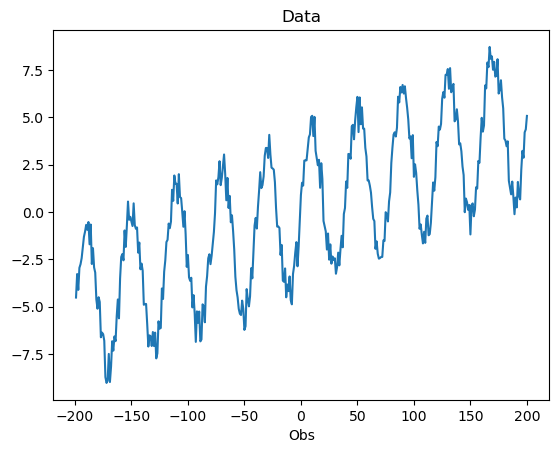

In [9]:
[n,m] = data.shape
fig, ax = plt.subplots(1, 1)
ax.plot(t, data.flatten())
ax.set_title("Data")
ax.set_xlabel("Obs")
plt.show()

### 2. ssaBasic.plotSingularValues(numValues, display)


The method plotSingularValues visualizes the singular values and their contribution to the overall signal variance, helping to interpret the importance of each component in Singular Spectrum Analysis. The method produces one or two types of plots depending on the value of the display parameter. The scree plot shows the first numValues singular values in descending order, highlighting the most significant components. The cumulative contribution plot is a bar chart that displays the relative cumulative contribution of each singular value to the total variance in the signal.
The method takes two parameters. The first parameter, numValues, specifies the number of singular values to display in the plots. The second parameter, display, determines which plot or plots are generated. If display is set to 'double' (default), both the scree plot and the cumulative contribution plot are produced. If display is set to 'scree', only the scree plot is created, while setting it to 'cm' generates only the cumulative contribution plot.

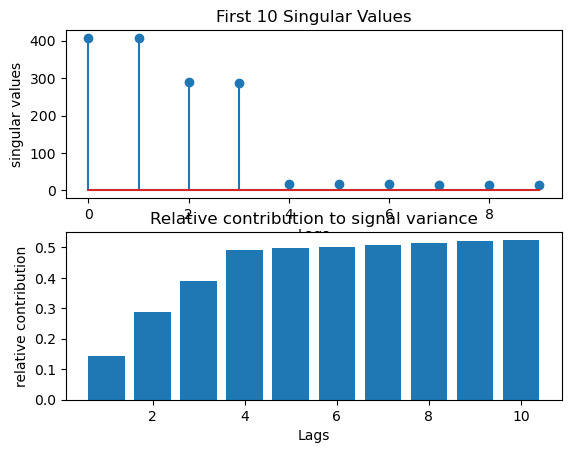

In [11]:
# Plot the first 10 singular values and their contribution
numValues = 10
mySSA.plotSingularValues(numValues, "double")

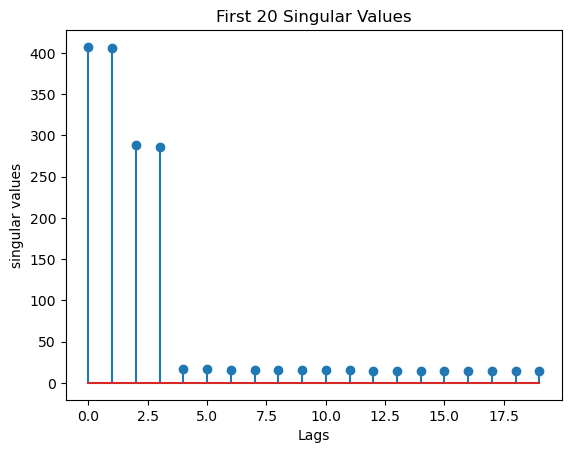

In [12]:
# Scree plot of the first 20 singular values
mySSA.plotSingularValues(20,'scree')

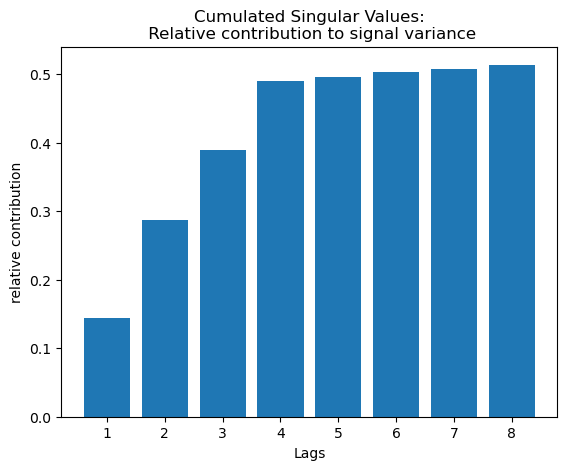

In [13]:
# Cumulative contribution plot for the first 8 singular values
mySSA.plotSingularValues(8,'cm')

### 3. C = ssaBasic.wcorrelation(Group, display)


The method wcorrelation assesses how separated are the eigen-triples (groups), according to the clusters specified in the array Group. In particular, the weighted correlation matrix quantifies the (weighted) correlation between these latter components. By default, this method draws the weighted correlation matrix for visual analysis. However, if the display parameter is set to any string other than 'on', the matrix will not be plotted.

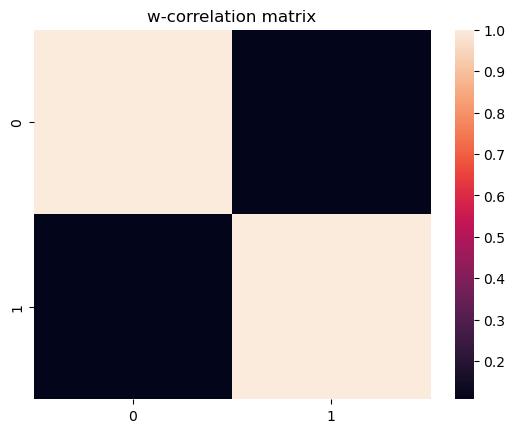

In [15]:
# Compute the weighted correlation matrix and plot it 
Group = np.zeros(mySSA.L+1, dtype=int)
Group[0] = 1
Group[1] = 1
Group[2] = 2
Group[3] = 2

wcorMatrix = mySSA.wcorrelation(Group)

In [16]:
# Compute the weighted correlation matrix without displaying the plot
wcorMatrix = mySSA.wcorrelation(Group,'off')

In [17]:
wcorMatrix

array([[1.        , 0.10798785],
       [0.10798785, 1.        ]])

### 4. ssaBasic.scatterplotseigEnvectors(Group)

The method scatterplotEigenvectors visualizes the periodicity of the principal components (eigen-triples) obtained through Singular Spectrum analysis, according to the specified grouping in the variable Group. This method generates scatter plots of paired eigenvectors. If a component corresponds to an odd number of eigen-triples, the scatter plot will be empty, indicating no clear periodicity.

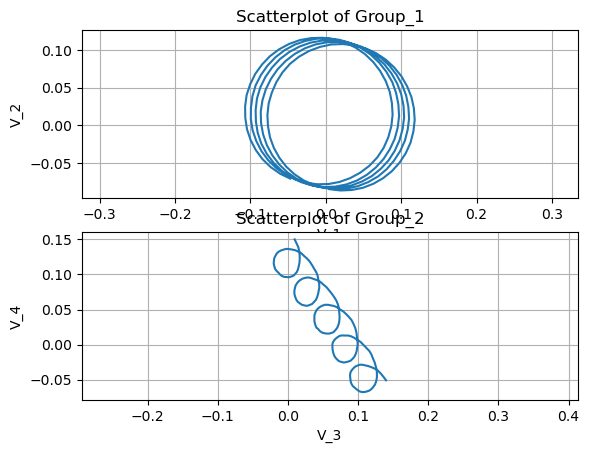

In [19]:
# Create scatter plots of eigenvectors to analyze periodicity
mySSA.scatterplotsEigenvectors(Group)

Component 2 corresponds to 3 singular vectors; scatter plot not possible.


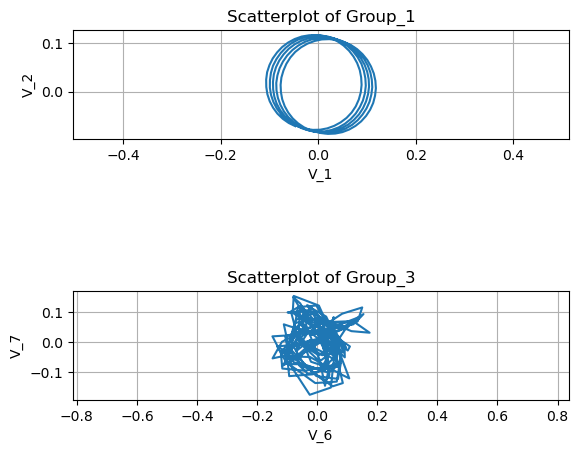

In [20]:
# For components that have an odd number of eigen-triples,
# the scatter plot will be empty, indicating no clear periodicity.
GroupOdd = np.zeros(mySSA.L+1, dtype=int)
GroupOdd[0] = 1
GroupOdd[1] = 1
GroupOdd[2] = 2
GroupOdd[3] = 2
GroupOdd[4] = 2
GroupOdd[5] = 3
GroupOdd[6] = 3

mySSA.scatterplotsEigenvectors(GroupOdd)

### 5. [best_L0, best_rmse] = ssaBasic.crossval_L0(r_prior, qInSample, numTest, display)


Given an "a priori" assessment of relevant leading singular values (r0), the method crossval_L0 automatically tunes the number of Lags (L0). This method takes three input parameters: r0, which is the number of leading singular values suggested by the scree plot; qInSample (optional), which represents the proportion of the sample used for cross-validation (default value is set to 0.9 if not provided); and numTest (optional), the number of trials for cross-validation (default value is set to 100 if not provided). The method returns best_L0, the optimal number of Lags, and best_rmse, the corresponding Root Mean Squared Error (RMSE) value, which is the total of both in-sample and out-of-sample errors. By default, the method will plot the results of the cross-validation, but if you wish to suppress the plot, you can pass a display parameter with a value other than 'on'. 

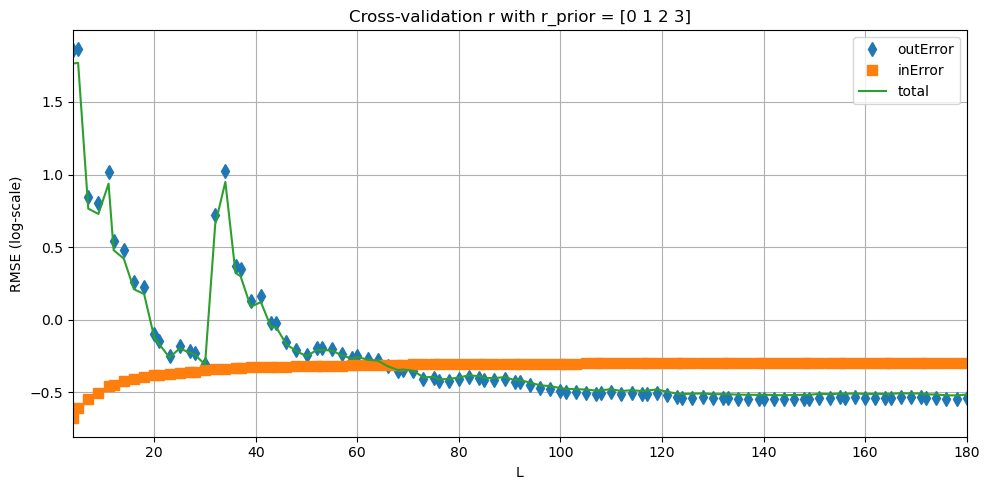

In [22]:
# Set a prior for r0
r0 = 4;
# Run cross-validation to find the best L0 with default parameters
[best_L0, best_rmse] = mySSA.crossval_L0(r0)

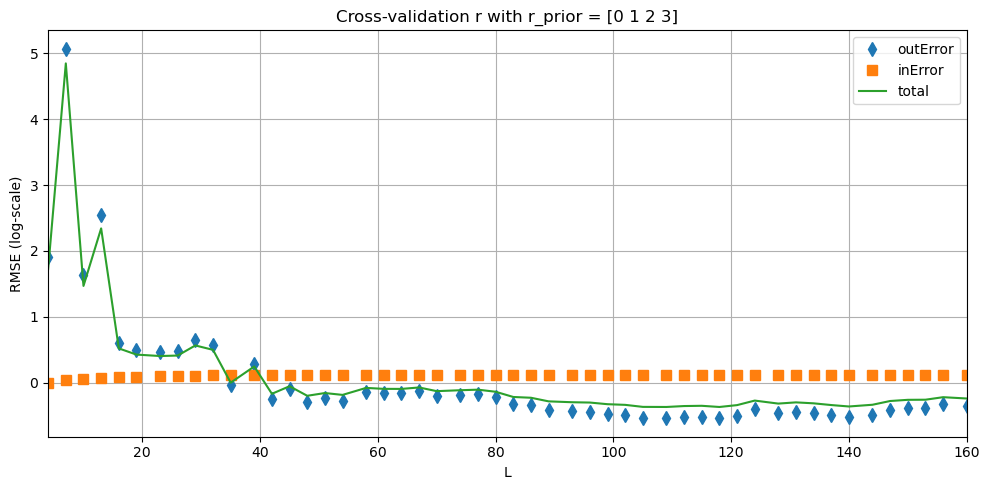

In [23]:
# Run cross-validation with a custom proportion for cross-validation and number of trials
[best_L0, best_rmse] = mySSA.crossval_L0(r0, 0.8, 50)

In [24]:
# Run cross-validation without displaying the plot
[best_L0, best_rmse] = mySSA.crossval_L0(r0, 0.8, 50, 'off')

### 6. [best_r0, best_rmse] = ssaBasic.crossval_r0(qInSample, numTest, display)
The method crossval_r0 automatically tunes the number of relevant singular values (r0) given the number of lags L0. This method takes several input parameters: qInSample (optional), which represents the proportion of the sample used for cross-validation (default value is set to 0.9 if not provided); and numTest (optional), the number of trials for cross-validation (default value is set to 100 if not provided). The method returns best_r0, the optimal number of eigen-triples (r), and best_rmse, the corresponding Root Mean Squared Error (RMSE) value, which is the total of both in-sample and out-of-sample errors. By default, the method will plot the results of the cross-validation, but if you wish to suppress the plot, you can pass a display parameter with a value other than 'on'. 

C:\Users\grego\Desktop\Project_U\ssaBasic.py:106: UserWarning: L0 is too high (L/2). Reducing it to L/2
  warnings.warn("L0 is too high (L/2). Reducing it to L/2")


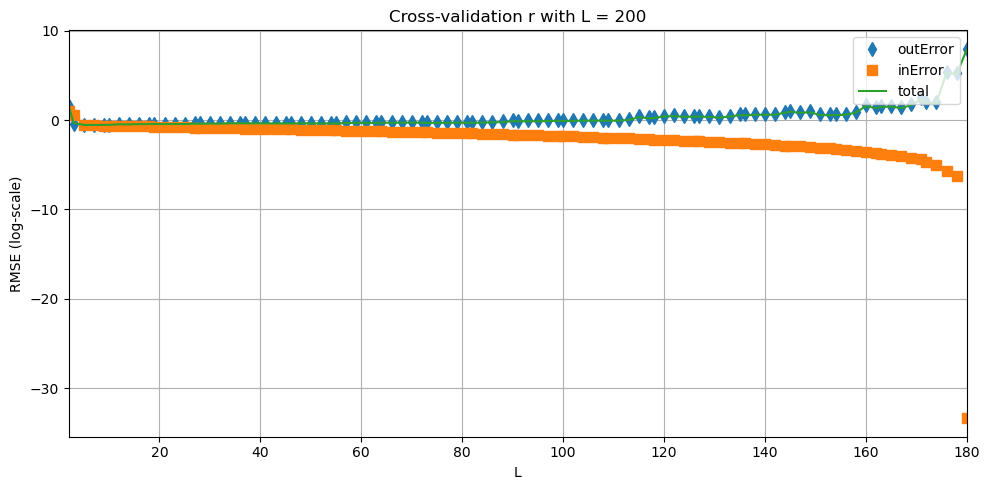

In [26]:
# Run cross-validation to find the best r0 with default parameters
[best_r0, best_rmse] = mySSA.crossval_r0()

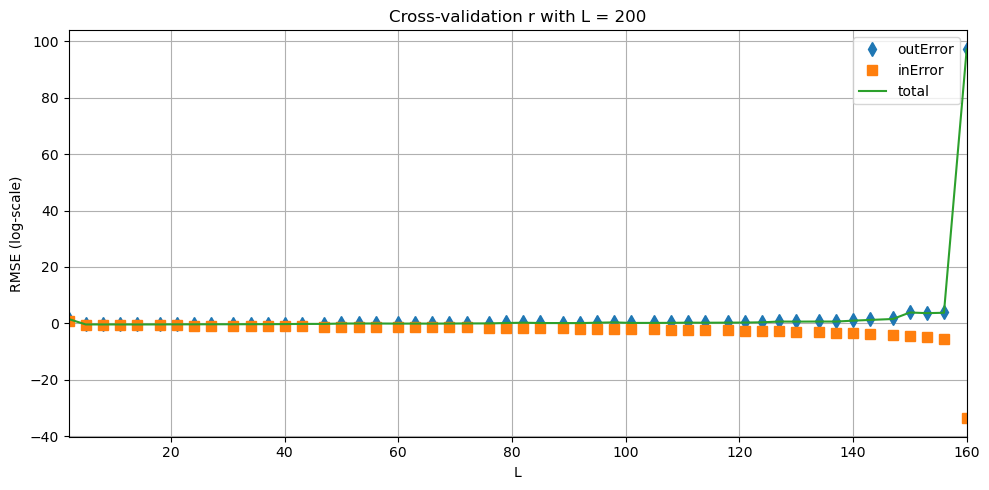

In [27]:
# Run cross-validation with a custom proportion for cross-validation and number of trials
[best_r0, best_rmse] = mySSA.crossval_r0(0.8, 50)

In [28]:
# Run cross-validation without displaying the plot
[best_r0, best_rmse] = mySSA.crossval_r0(0.8, 50, 'off')

### 7. [testRMSE, xF] = ssaBasic.backtest(r0,qInSample)

The method backtest evaluates the robustness of the SSA forecasts by splitting the data sample into two sets: an in-sample set and an out-of-sample set. It performs the calibration using the SSA method on the in-sample data and then compares the forecast computed according to the Linear Recursion Formula (LRF) with the actual data from the out-of-sample set. This method helps assessing how well the model matches real data.

The method takes several inputs. The first input is r0, which specifies the number of eigen-triples to use for reconstruction and forecasting with SSA. The second input is qInSample (optional), which is a array indicating the proportion of data to be used as the in-sample set for the backtesting (e.g. np.array([0.8, 0.7])). 

The method returns two outputs. The first output is testRMSE, a matrix containing the RMSE values for each in-sample proportion. The first column of testRMSE contains the RMSE values of the SSA only forecasts, while the second column is zero. The second output is xF, a matrix of forecasts. The first column of xF contains the SSA forecasts. The second column will contain an array of zeros.

In [30]:
r0 = 4;
# Run the backtest for SSA with r = 4, using 90% and 80% of the data as in-sample
[testRMSE, xF] = mySSA.backtest(r0, np.array([0.9, 0.8]))

### 8. y = ssaBasic.reconstruction(r0)
The method reconstruction reconstructs the signal from its trajectory matrix using Singular Value Decomposition (SVD). The reconstruction is based on the r0 leading singular value.

In [32]:
r0 = 4
reconstructedSignal = mySSA.reconstruction(r0)

***
<span style=color:black>
    <b>Plot true vs reconstructed signal</b>
</span>
<br>

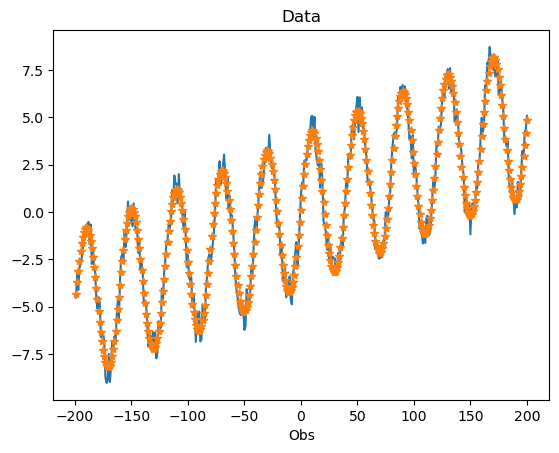

In [34]:
fig, ax = plt.subplots(1, 1)
ax.plot(t, data.flatten())
ax.plot(t, reconstructedSignal.flatten(),"*")
ax.set_title("Data")
ax.set_xlabel("Obs")
plt.show()

### 9. y = ssaBasic.grouping(Group, display)

The method grouping groups eigen-triples according to the variable Group, which is a specified grouping array. The Group array consists of a series of numbers that indicate how the eigen-triples should be grouped. For example, in case Group = np.array([1 1 2 2]), the first two and the third and fourth eigen-triples will form two separate groups. This method helps to combine similar components, facilitating the interpretation of the signal structure. The variable display (optional), controls whether the grouped components are plotted. If display is set to any string other than 'on', no plot will be generated.

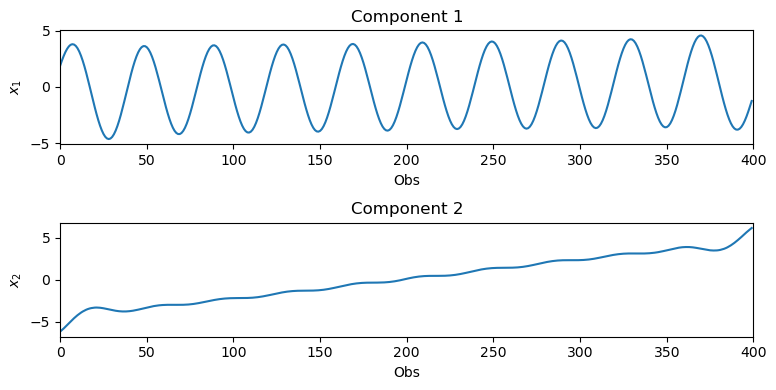

In [36]:
# Group eigen-triples based on the array G = np.array([1, 1, 2, 2, 0, 0, ...])
groupedComponents = mySSA.grouping(Group)

In [37]:
# Group eigen-triples and suppress the plot
groupedComponents = mySSA.grouping(Group, 'off');

### 10. [xM, xCi, xSamp] = ssaBasic.forecast(r0, M, numSamp, display)

The method forecast reconstructs and forecasts the signal from its trajectory matrix for the number of periods specified in M. If r0 is a scalar, the method uses the first r0 singular values for the reconstruction. If r0 is an array, the method uses the singular values corresponding to the indices listed in r0. For example, if r = np.array([0, 1, 4]), it will use the 1st, 2nd, and 5th singular values for the reconstruction and forecast. An optional input, numSamp, defines the number of bootstrap samples to generate for confidence bands estimation, with a default value of 100 if not specified. Another optional input, display, controls whether a fan plot of the forecast is shown. If set to 'on', the plot will be displayed; if set to 'off' (the default), no plot will be shown. The first part of the graph reports the last 10% of the sample.
The output consists of three variables. The first output, xM, is a vector containing the original time series data followed by the forecasted values for the next M periods. The second output, xCi, is a matrix containing the confidence intervals for the forecasted values, calculated by the bootstrap method, with intervals corresponding to the 97.5th and 2.5th percentiles. The third output, xSamp, is a matrix containing the forecast values derived from the bootstrap samples, where each row represents a different bootstrap sample forecast.

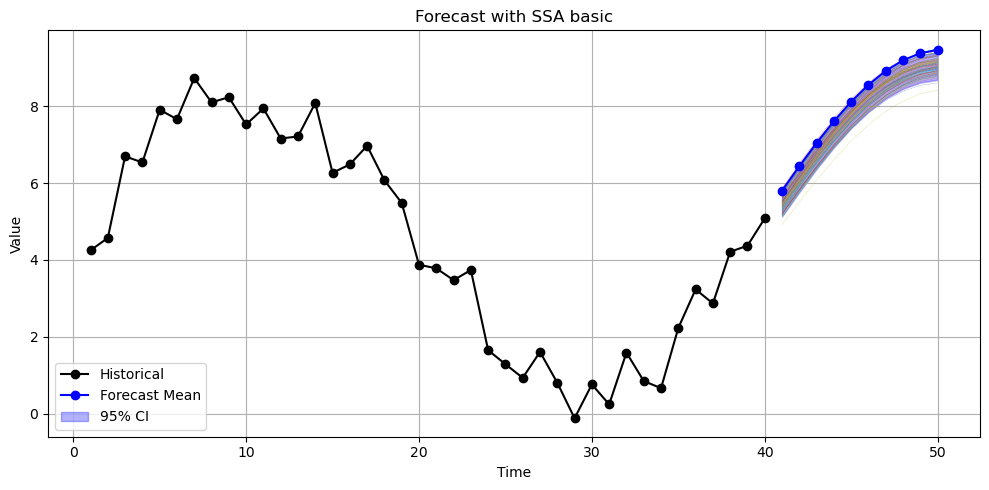

In [39]:
# Reconstruct the signal using the first 4 singular values and forecast 10 periods ahead
r0 = 4;
M = 10;

[xM, xCi, xSamp] = mySSA.forecast(r0,M, display="on")

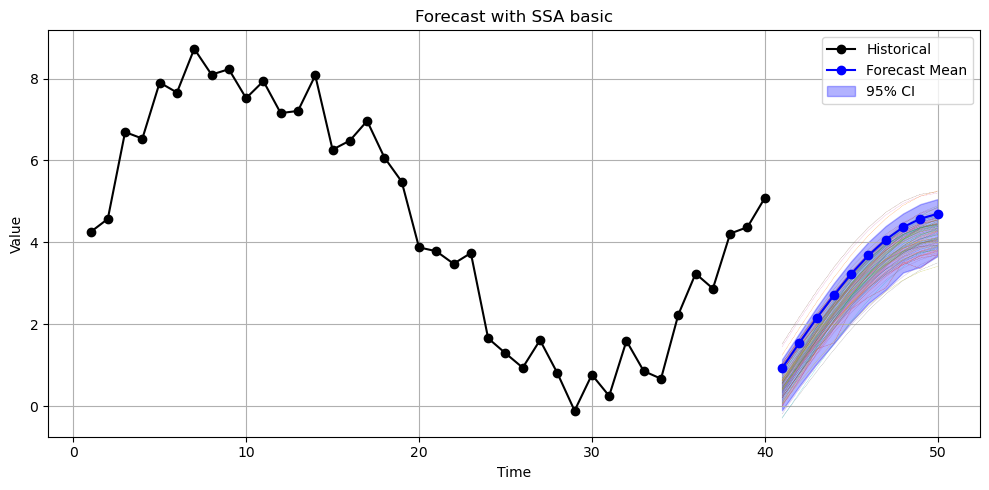

In [40]:
# Reconstruct the signal using the 1st, 2nd, and 4th singular values and forecast 10 periods ahead
[xM, xCi, xSamp] = mySSA.forecast(np.array([0, 1, 3]), M, display="on")

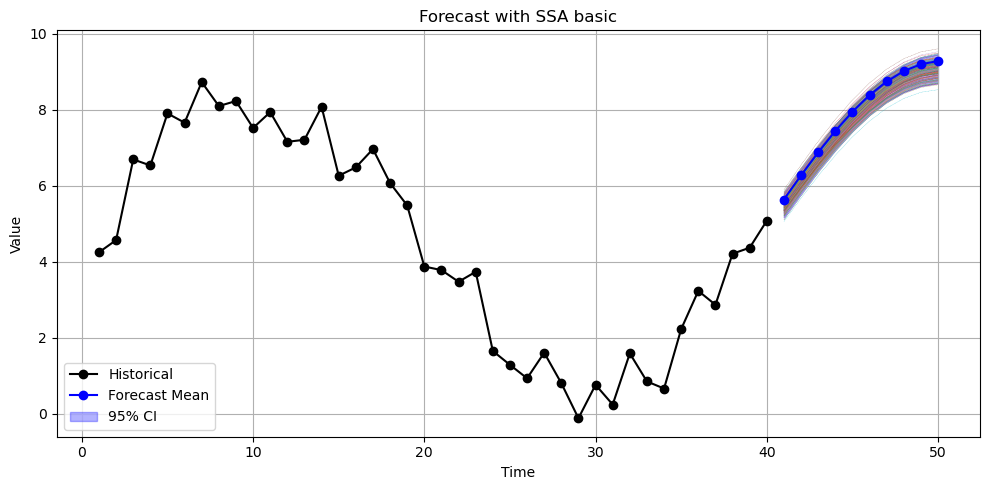

In [41]:
# Reconstruct the signal, forecast 10 periods ahead, generate 200 bootstrap samples, and display the fan plot
[xM, xCi, xSamp] = mySSA.forecast(r0, M, 200, 'on')

In [42]:
# Reconstruct the signal, forecast 10 periods ahead, and suppress the fan plot
[xM, xCi, xSamp] = mySSA.forecast(4, 10, 200, 'off')